In this program we are calculating the word frequency in a file excluding some selected words. We input 2 files. One with the data from which word frequency to be calculated and other one with the words to be excluded from the calculation.

In [1]:
#Importing pandas for data manipulation and analysis and numpy to use arrays and operate on data. 
#matplotlib for the graphical representations and sys - system specific parameters.
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Read in data file and exclude file

file = open("/tmp/wordfile.txt","r+")
excludefile = open("/tmp/excludefile.txt","r+")
excludewords =[]

In [3]:
#Create array of excluded words

for word in excludefile.read().split():
    excludewords.append(word)
excludefile.close()

In [4]:
#Counting the words

wordcount={}
for word in file.read().split():
        if word not in excludewords:
            if word not in wordcount:
                wordcount[word] = 1
            else:
                wordcount[word] = wordcount[word] +1
file.close()

In [5]:
#Convert word to data frame

dataFrame=pd.DataFrame(wordcount.items())
dataFrame = dataFrame.rename(columns={0:'word', 1:'count'})
dataFrame['perc'] = dataFrame['count']/(dataFrame['count'].sum())*100
dataFrame = dataFrame.sort_values(by = 'perc', ascending = False)

In [6]:
print dataFrame

            word  count      perc
52           the      6  7.317073
42          term      4  4.878049
27          that      4  4.878049
28          This      3  3.658537
35           not      3  3.658537
38         class      3  3.658537
48       project      2  2.439024
22           you      2  2.439024
24           can      2  2.439024
45   programming      2  2.439024
49   assignments      2  2.439024
8          paper      2  2.439024
6             an      2  2.439024
51          does      2  2.439024
29  assignments.      2  2.439024
34         focus      1  1.219512
36         truly      1  1.219512
33   significant      1  1.219512
37          with      1  1.219512
43       receive      1  1.219512
39      projects      1  1.219512
40      electing      1  1.219512
41            on      1  1.219512
31       however      1  1.219512
44       require      1  1.219512
46       maximum      1  1.219512
47           One      1  1.219512
50        amount      1  1.219512
53      requir

In [7]:
# Retrieving top 10 words

selectedwords = dataFrame['word'][:10]
axis = np.arange(len(selectedwords))
freqdata = dataFrame['count'][:10]
plt.bar(axis, freqdata,color='green', align='center')

<Container object of 10 artists>

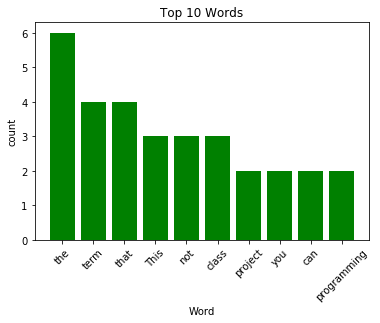

In [8]:
# Graph specifications

plt.xticks(axis, selectedwords, rotation = 45, fontsize = 10)

plt.xlabel('Word')
plt.ylabel('count')
plt.title('Top 10 Words')

plt.show()